In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:

# Importing the training set
training_set = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = training_set.iloc[:,1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

In [3]:
# Getting the inputs and the ouputs
X_train = training_set[0:1257]
y_train = training_set[1:1258]

# Reshaping
X_train = np.reshape(X_train, (1257, 1, 1))


In [4]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()


Using TensorFlow backend.


In [5]:
# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 200)


Epoch 1/200
1257/1257 [==============================] - 2s - loss: 0.3603     
Epoch 2/200
1257/1257 [==============================] - 0s - loss: 0.2661     
Epoch 3/200
1257/1257 [==============================] - 0s - loss: 0.1982     
Epoch 4/200
1257/1257 [==============================] - 0s - loss: 0.1501     
Epoch 5/200
1257/1257 [==============================] - 0s - loss: 0.1183     
Epoch 6/200
1257/1257 [==============================] - 0s - loss: 0.0978     
Epoch 7/200
1257/1257 [==============================] - 0s - loss: 0.0854     
Epoch 8/200
1257/1257 [==============================] - 0s - loss: 0.0784     
Epoch 9/200
1257/1257 [==============================] - 0s - loss: 0.0744     
Epoch 10/200
1257/1257 [==============================] - 0s - loss: 0.0722     
Epoch 11/200
1257/1257 [==============================] - 0s - loss: 0.0707     
Epoch 12/200
1257/1257 [==============================] - 0s - loss: 0.0697     
Epoch 13/200
1257/1257 [=============

1257/1257 [==============================] - 0s - loss: 2.7190e-04     
Epoch 101/200
1257/1257 [==============================] - 0s - loss: 2.6992e-04     
Epoch 102/200
1257/1257 [==============================] - 0s - loss: 2.6880e-04     
Epoch 103/200
1257/1257 [==============================] - 0s - loss: 2.6760e-04     
Epoch 104/200
1257/1257 [==============================] - 0s - loss: 2.6766e-04     
Epoch 105/200
1257/1257 [==============================] - 0s - loss: 2.6559e-04     
Epoch 106/200
1257/1257 [==============================] - 0s - loss: 2.6660e-04     
Epoch 107/200
1257/1257 [==============================] - 0s - loss: 2.6504e-04     
Epoch 108/200
1257/1257 [==============================] - 0s - loss: 2.6619e-04     
Epoch 109/200
1257/1257 [==============================] - 0s - loss: 2.6502e-04     
Epoch 110/200
1257/1257 [==============================] - 0s - loss: 2.6484e-04     
Epoch 111/200
1257/1257 [==============================] - 0s - loss

1257/1257 [==============================] - 0s - loss: 2.5787e-04     
Epoch 195/200
1257/1257 [==============================] - 0s - loss: 2.5522e-04     
Epoch 196/200
1257/1257 [==============================] - 0s - loss: 2.5240e-04     
Epoch 197/200
1257/1257 [==============================] - 0s - loss: 2.5327e-04     
Epoch 198/200
1257/1257 [==============================] - 0s - loss: 2.5500e-04     
Epoch 199/200
1257/1257 [==============================] - 0s - loss: 2.5841e-04     
Epoch 200/200
1257/1257 [==============================] - 0s - loss: 2.5971e-04     - ETA: 0s - loss: 2.280


In [6]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
test_set = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = test_set.iloc[:,1:2].values



In [7]:
# Getting the predicted stock price of 2017
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (20, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


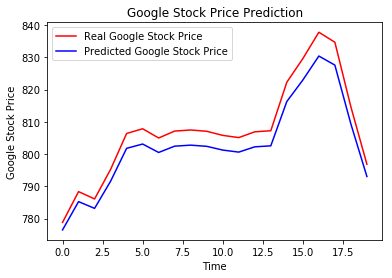

In [8]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [9]:
# Getting the real stock price of 2012 - 2016
real_stock_price_train = pd.read_csv('Google_Stock_Price_Train.csv')
real_stock_price_train = real_stock_price_train.iloc[:,1:2].values

# Getting the predicted stock price of 2012 - 2016
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)


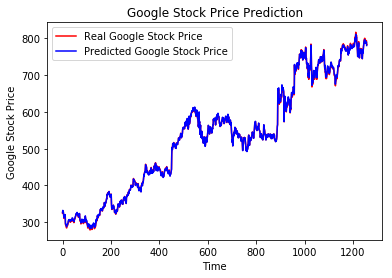

In [10]:
# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


In [11]:
# Part 4 - Evaluating the RNN

import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
